In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Data Generation
===

In [3]:
np.random.seed(10)
p, q = (np.random.rand(i, 2) for i in (4, 5))
p_big, q_big = (np.random.rand(i, 80) for i in (100, 120))

print(p, "\n\n", q)

[[0.77132064 0.02075195]
 [0.63364823 0.74880388]
 [0.49850701 0.22479665]
 [0.19806286 0.76053071]] 

 [[0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]
 [0.81262096 0.61252607]
 [0.72175532 0.29187607]]


Solution
===

In [24]:
def naive(p, q):
    result = np.zeros((p.shape[0], q.shape[0]))
    for i in range(p.shape[0]):
        for j in range(q.shape[0]):
            tmp = 0
            for k in range(p.shape[1]):
                tmp += (p[i,k]-q[j,k])**2
            result[i,j] = tmp
naive(p,q)

NameError: ignored

### Use matching indices

Instead of iterating through indices, one can use them directly to parallelize the operations with Numpy.

In [5]:
rows, cols = np.indices((p.shape[0], q.shape[0]))
print(rows, end='\n\n')
print(cols)

[[0 0 0 0 0]
 [1 1 1 1 1]
 [2 2 2 2 2]
 [3 3 3 3 3]]

[[0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]]


In [ ]:
p.shape[0]

4

In [6]:
print(p[rows.ravel()], end='\n\n')
print(q[cols.ravel()])

[[0.77132064 0.02075195]
 [0.77132064 0.02075195]
 [0.77132064 0.02075195]
 [0.77132064 0.02075195]
 [0.77132064 0.02075195]
 [0.63364823 0.74880388]
 [0.63364823 0.74880388]
 [0.63364823 0.74880388]
 [0.63364823 0.74880388]
 [0.63364823 0.74880388]
 [0.49850701 0.22479665]
 [0.49850701 0.22479665]
 [0.49850701 0.22479665]
 [0.49850701 0.22479665]
 [0.49850701 0.22479665]
 [0.19806286 0.76053071]
 [0.19806286 0.76053071]
 [0.19806286 0.76053071]
 [0.19806286 0.76053071]
 [0.19806286 0.76053071]]

[[0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]
 [0.81262096 0.61252607]
 [0.72175532 0.29187607]
 [0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]
 [0.81262096 0.61252607]
 [0.72175532 0.29187607]
 [0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]
 [0.81262096 0.61252607]
 [0.72175532 0.29187607]
 [0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]
 [0.81262096 0.61252607]
 [0.72175532 0.29187607

In [20]:
def with_indices(p, q):
    rows, cols = np.indices((p.shape[0], q.shape[0]))
    distances = np.sqrt(np.sum((p[rows.ravel(), :] - q[cols.ravel(), :])**2, axis=1))
    return distances.reshape((p.shape[0], q.shape[0]))
with_indices(p,q)

array([[0.60599073, 0.93659449, 0.91124856, 0.59321356, 0.27561751],
       [0.80746999, 0.21102354, 0.67268649, 0.22495084, 0.46534491],
       [0.35654215, 0.75217493, 0.57200052, 0.49900068, 0.23310825],
       [0.67281411, 0.52407472, 0.31520226, 0.63212897, 0.70277376]])

In [18]:
np.sum((p[rows.ravel(), :] - q[cols.ravel(), :])**2, axis=1)

array([0.36722477, 0.87720924, 0.83037395, 0.35190232, 0.07596501,
       0.65200778, 0.04453094, 0.45250711, 0.05060288, 0.21654589,
       0.12712231, 0.56576712, 0.32718459, 0.24900168, 0.05433945,
       0.45267882, 0.27465432, 0.09935246, 0.39958703, 0.49389096])

In [26]:
p[:,np.newaxis,:]

array([[[0.77132064, 0.02075195]],

       [[0.63364823, 0.74880388]],

       [[0.49850701, 0.22479665]],

       [[0.19806286, 0.76053071]]])

In [29]:
q[np.newaxis,:,:]

array([[[0.16911084, 0.08833981],
        [0.68535982, 0.95339335],
        [0.00394827, 0.51219226],
        [0.81262096, 0.61252607],
        [0.72175532, 0.29187607]]])

In [30]:
p[:,np.newaxis,:]-q[np.newaxis,:,:]

array([[[ 0.60220981, -0.06758786],
        [ 0.08596082, -0.9326414 ],
        [ 0.76737238, -0.49144031],
        [-0.04130032, -0.59177412],
        [ 0.04956533, -0.27112412]],

       [[ 0.4645374 ,  0.66046407],
        [-0.05171158, -0.20458946],
        [ 0.62969997,  0.23661162],
        [-0.17897273,  0.13627782],
        [-0.08810708,  0.45692781]],

       [[ 0.32939618,  0.13645683],
        [-0.18685281, -0.7285967 ],
        [ 0.49455875, -0.28739562],
        [-0.31411395, -0.38772942],
        [-0.22324831, -0.06707942]],

       [[ 0.02895203,  0.6721909 ],
        [-0.48729695, -0.19286263],
        [ 0.1941146 ,  0.24833845],
        [-0.6145581 ,  0.14800465],
        [-0.52369245,  0.46865464]]])

In [32]:
p[:,np.newaxis,:].shape

(4, 1, 2)

In [33]:
q[np.newaxis,:,:].shape

(1, 5, 2)

In [35]:
(p[:,np.newaxis,:]-q[np.newaxis,:,:]).shape

(4, 5, 2)

### Use a library

`scipy` is the equivalent of matlab toolboxes and have a lot to offer. Actually the pairwise computation is part of the library through the `spatial` module.

In [21]:
from scipy.spatial.distance import cdist

def scipy_version(p, q):
    return cdist(p, q)

### Numpy Magic

In [22]:
def tensor_broadcasting(p, q):
    return np.sqrt(np.sum((p[:,np.newaxis,:]-q[np.newaxis,:,:])**2, axis=2))

# Compare methods

In [25]:
methods = [naive, with_indices, scipy_version, tensor_broadcasting]
timers = []
for f in methods:
    r = %timeit -o f(p_big, q_big)
    timers.append(r)

1 loop, best of 5: 883 ms per loop
100 loops, best of 5: 3.73 ms per loop
1000 loops, best of 5: 644 µs per loop
100 loops, best of 5: 2.46 ms per loop


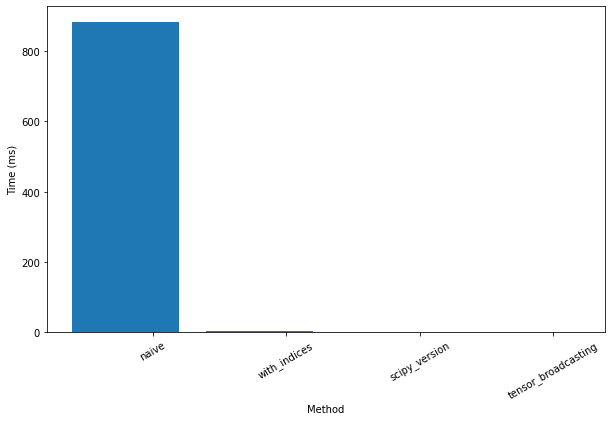

In [36]:
plt.figure(figsize=(10,6))
plt.bar(np.arange(len(methods)), [r.best*1000 for r in timers], log=False)  # Set log to True for logarithmic scale
plt.xticks(np.arange(len(methods))+0.2, [f.__name__ for f in methods], rotation=30)
plt.xlabel('Method')
plt.ylabel('Time (ms)')
plt.show()